In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
population_data  = pd.read_csv(r'C:\\\\.csv')

In [5]:
population_data.head(5)

,country_name,country_code,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,2.179059,1.548572,1.389337,1.215721,1.032841,0.862184,0.388847,-0.085719,...,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045,-0.086392
1,Africa Eastern and Southern,AFE,2.660180,2.732633,2.753248,2.806915,2.840787,2.813609,2.830505,2.881589,...,2.780207,2.774990,2.802586,2.728159,2.655672,2.688371,2.691134,2.678184,2.607472,2.543757
2,Afghanistan,AFG,1.925952,2.014879,2.078997,2.139651,2.216007,2.253524,2.292638,2.347351,...,3.466788,3.657576,3.121341,2.581549,2.866492,2.885208,2.908529,3.134747,2.851358,2.534498
3,Africa Western and Central,AFW,2.115789,2.145723,2.190827,2.211360,2.242567,2.272816,2.275721,2.295953,...,2.761839,2.750731,2.723317,2.713059,2.706266,2.669239,2.633982,2.615646,2.573377,2.539799
4,Angola,AGO,1.558355,1.460738,1.410425,1.301745,1.111041,0.875806,0.696698,0.695985,...,3.735525,3.684429,3.617678,3.586211,3.550987,3.464457,3.395278,3.268348,3.166030,3.096753


In [7]:
# checking for missing values in this data set
missing_values = population_data.isnull().sum()
missing_values = missing_values[missing_values > 0]

#Now lets handle the missing values data
if not missing_values.empty:
    #print columns with the missing values and their counts
    print("Columns with missing values:")
    print(missing_values)

    #fill missing values with the mean of each column
    for column in missing_values.index:
        mean_values = population_data[column].mean()
        population_data[column].fillna(mean_values, inplace=True)

else:
    print("No missing values found.")

Columns with missing values:
1961    1
1962    1
1963    1
1964    1
1965    1
1966    1
1967    1
1968    1
1969    1
1970    1
1971    1
1972    1
1973    1
1974    1
1975    1
1976    1
1977    1
1978    1
1979    1
1980    1
1981    1
1982    1
1983    1
1984    1
1985    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
2022    1
dtype: int64


In [11]:
import numpy as np
 #Now let's select the columns with growth rates
growth_data = population_data.select_dtypes(include=[np.number])

# Let's calculate the key statistics for each year
statistics = growth_data.agg(['mean', 'median' , lambda x: x.max() - x.min()]).transpose()
statistics.columns = ['Mean', 'Median', 'Range']

#Display the summary statistic given for this task
print(statistics)


          Mean    Median      Range
1961  2.194680  2.196674  11.653781
1962  2.286442  2.298184  13.284240
1963  2.359047  2.399072  14.697195
1964  2.304001  2.392772  14.258618
1965  2.290874  2.380932  14.318536
...        ...       ...        ...
2018  1.181511  1.161378   8.604473
2019  1.160233  1.099593   6.836352
2020  1.055733  1.013088   6.711178
2021  0.902555  0.902989   7.964073
2022  0.912771  0.898395  17.970025

[62 rows x 3 columns]


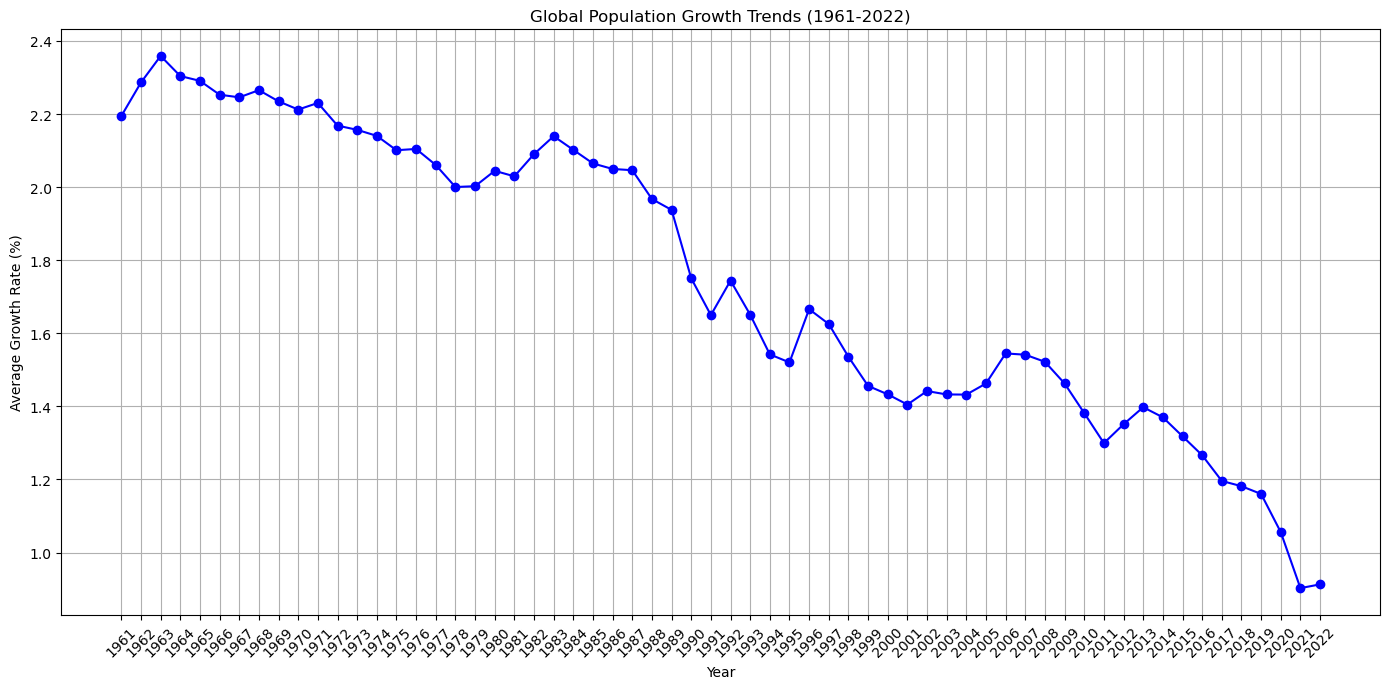

In [12]:
import matplotlib.pyplot as plt

# Extracting the year columns for trend analysis
year_columns = population_data.columns[2:]  # Assuming the first two columns are non-year columns

# Calculating the global mean growth rate for each year
global_growth_trends = population_data[year_columns].mean()

# Plotting the global population growth trends
plt.figure(figsize=(14, 7))
plt.plot(global_growth_trends.index, global_growth_trends.values, marker='o', linestyle='-', color='b')
plt.title('Global Population Growth Trends (1961-2022)')
plt.xlabel('Year')
plt.ylabel('Average Growth Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

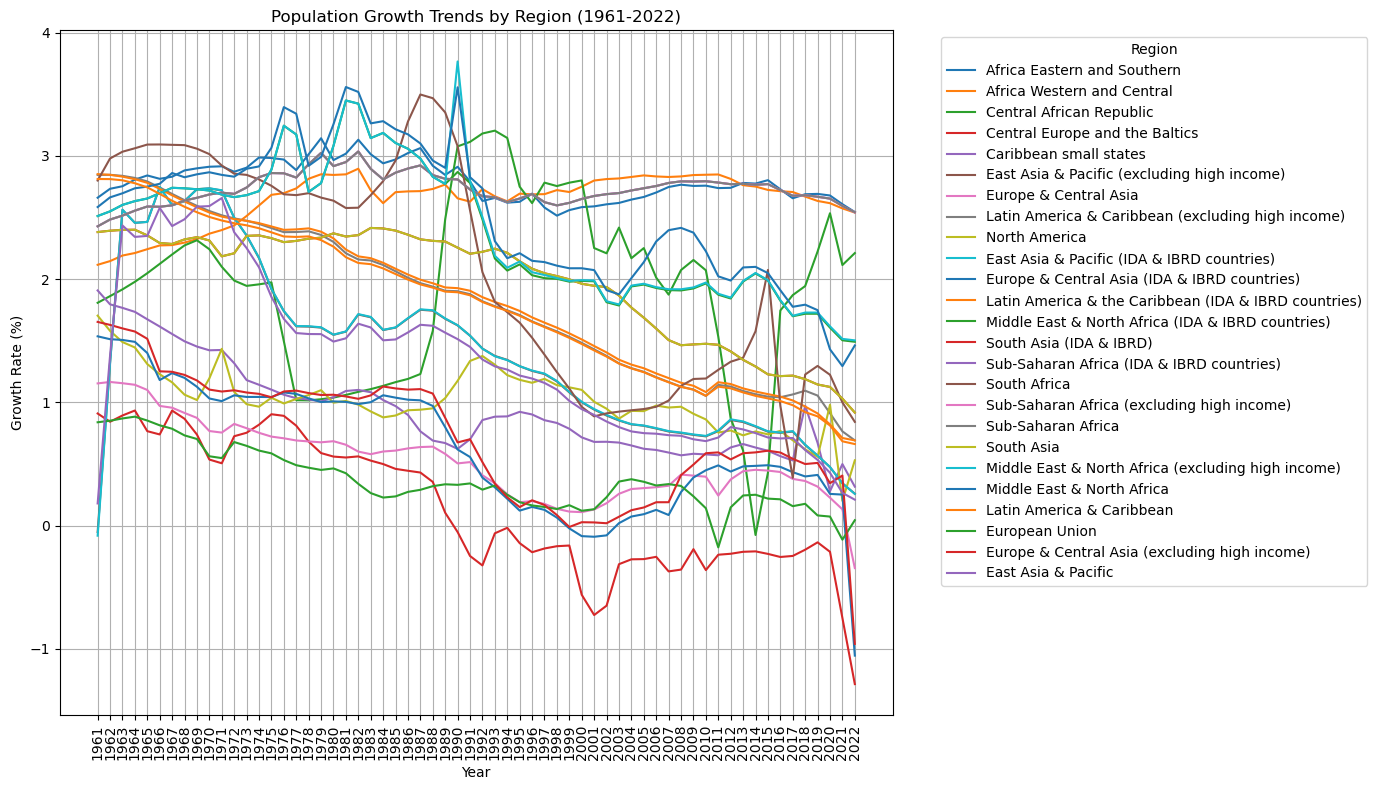

Region with the highest average growth rate:
Africa Eastern and Southern 2.794751914514994
Region with the lowest average growth rate:
Central Europe and the Baltics 0.1358176329891605


In [13]:
# Analyze and visualize population growth trends for different regions
# Identify regions with the highest and lowest growth rates

# Assuming that the 'country_name' column includes region names that group multiple countries
# We will filter out regions by checking if 'country_name' contains terms typically used for regions like "Africa", "Europe", etc.

# Extracting regions from the dataset
regions = population_data[population_data['country_name'].str.contains('Africa|Asia|Europe|Latin America|Caribbean|Oceania|Middle East|North America', regex=True)]

# Calculating mean growth rates for each region across all years
regions_mean_growth = regions.set_index('country_name').iloc[:, 2:].mean(axis=1).sort_values()

# Plotting the regional growth trends
plt.figure(figsize=(14, 8))
for region in regions['country_name']:
    plt.plot(year_columns, regions.loc[regions['country_name'] == region, year_columns].values.flatten(), label=region)

plt.title('Population Growth Trends by Region (1961-2022)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Displaying regions with the highest and lowest growth rates
print("Region with the highest average growth rate:")
print(regions_mean_growth.idxmax(), regions_mean_growth.max())

print("Region with the lowest average growth rate:")
print(regions_mean_growth.idxmin(), regions_mean_growth.min())

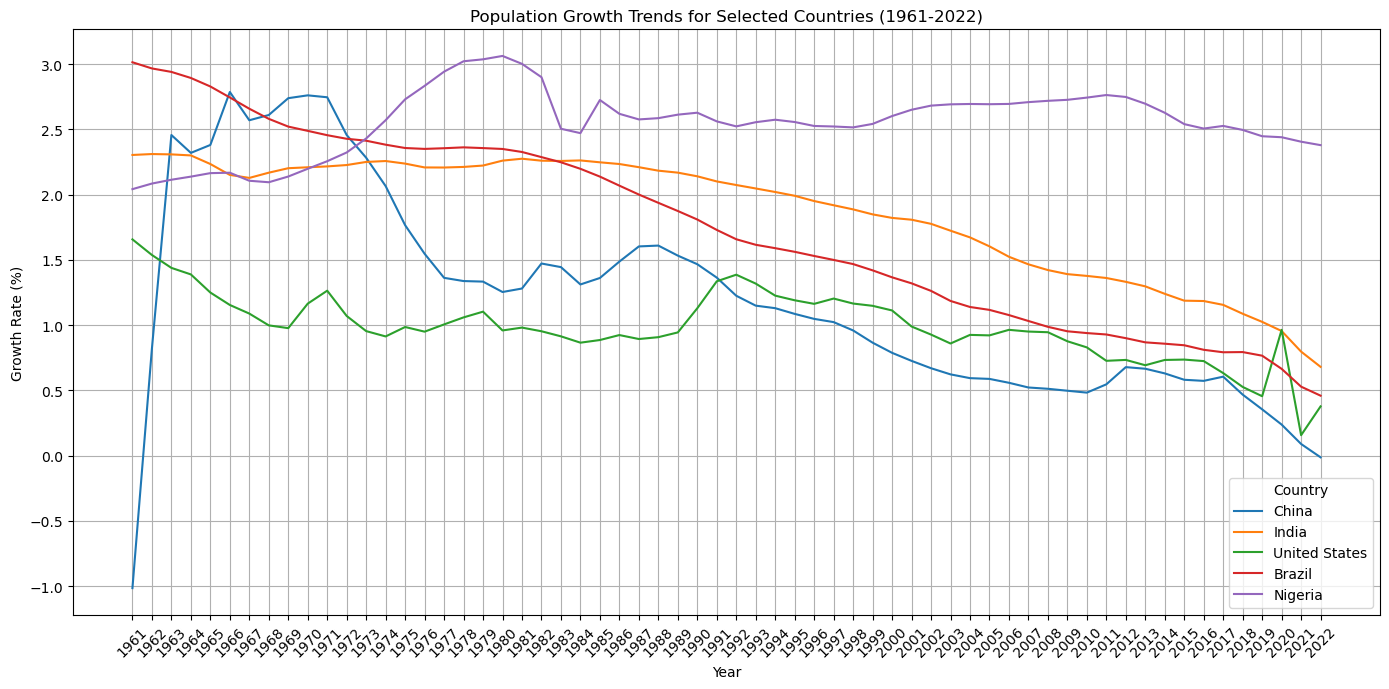

Mean Growth Rates for Selected Countries:
country_name
Brazil           1.742531
China            1.209663
India            1.864842
Nigeria          2.551461
United States    0.987626
dtype: float64
Outliers based on Growth Rates:
Series([], dtype: float64)


In [14]:
# Analyzing population growth trends for specific countries of interest
# Let's focus on a few countries: China, India, United States, Brazil, and Nigeria

countries_of_interest = ['China', 'India', 'United States', 'Brazil', 'Nigeria']
selected_countries = population_data[population_data['country_name'].isin(countries_of_interest)]

# Plotting the population growth trends for these countries
plt.figure(figsize=(14, 7))
for country in countries_of_interest:
    plt.plot(year_columns, selected_countries.loc[selected_countries['country_name'] == country, year_columns].values.flatten(), label=country)

plt.title('Population Growth Trends for Selected Countries (1961-2022)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend(title='Country')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparing growth rates between countries
# Calculate the mean growth rate for each country over the period and identify outliers
mean_growth_rates = selected_countries.set_index('country_name')[year_columns].mean(axis=1)
print("Mean Growth Rates for Selected Countries:")
print(mean_growth_rates)

# Identifying outliers based on growth rates
# Considering growth rates significantly higher or lower than the mean as outliers
overall_mean_growth = mean_growth_rates.mean()
std_dev_growth = mean_growth_rates.std()
outliers = mean_growth_rates[(mean_growth_rates > overall_mean_growth + 2 * std_dev_growth) | (mean_growth_rates < overall_mean_growth - 2 * std_dev_growth)]
print("Outliers based on Growth Rates:")
print(outliers)

In [15]:
import os

# Path to the GDP data file
gdp_data_path = './The_World_Bank_GDP_per_capita_(annual_).csv'

# Check if the GDP data file exists in the specified directory
if os.path.exists(gdp_data_path):
    print("GDP data file exists and is correctly placed.")
else:
    print("GDP data file does not exist in the specified directory. Please check the file path.")


GDP data file does not exist in the specified directory. Please check the file path.


In [16]:
# Since the GDP data file is missing, we will proceed with statistical tests on the available population growth data.
# We will use Pearson correlation to check the relationship between the years' growth rates.

from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient for each pair of consecutive years
correlations = {}
years = population_data.columns[2:]  # Year columns start from the third column

for i in range(len(years) - 1):
    year1 = years[i]
    year2 = years[i + 1]
    corr, _ = pearsonr(population_data[year1], population_data[year2])
    correlations[f'{year1}-{year2}'] = corr

# Display the correlation coefficients
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Year Pair', 'Correlation Coefficient'])
print(correlation_df)

# To further analyze, let's find the average correlation across all year pairs
average_correlation = correlation_df['Correlation Coefficient'].mean()
print(f"Average correlation between consecutive years: {average_correlation}")

# Check if there are any significantly low correlations indicating a change in trend
significant_changes = correlation_df[correlation_df['Correlation Coefficient'] < average_correlation - 2 * correlation_df['Correlation Coefficient'].std()]
print("Significant changes in trends between years:")
print(significant_changes)

    Year Pair  Correlation Coefficient
0   1961-1962                 0.934377
1   1962-1963                 0.883603
2   1963-1964                 0.899646
3   1964-1965                 0.975369
4   1965-1966                 0.980821
..        ...                      ...
56  2017-2018                 0.945530
57  2018-2019                 0.942797
58  2019-2020                 0.907873
59  2020-2021                 0.922878
60  2021-2022                 0.671584

[61 rows x 2 columns]
Average correlation between consecutive years: 0.8806396802599274
Significant changes in trends between years:
    Year Pair  Correlation Coefficient
28  1989-1990                 0.477204
30  1991-1992                 0.017598
34  1995-1996                 0.158791


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables
label_encoder = LabelEncoder()
population_data['country_code_encoded'] = label_encoder.fit_transform(population_data['country_code'])

# Prepare the dataset for modeling
X = population_data.drop(columns=['country_name', 'country_code'] + [str(year) for year in range(2021, 2023)])
y = population_data['2022']  # Target year for prediction

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.3168282745035866
R^2 Score: 0.807911235710735


In [23]:
# Evaluate the performance of the predictive models using additional metrics
from sklearn.metrics import mean_absolute_error, explained_variance_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_variance}")

Mean Absolute Error: 0.35739521385098727
Explained Variance Score: 0.8132502803462345
